In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | waingapu
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | cockburn town
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | kamenka
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | surt
Processing Record 19 of Set 1 | nagireddipalle
City not found. Skipping...
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | jamestown
Processing Record 23

City not found. Skipping...
Processing Record 35 of Set 4 | inhambane
Processing Record 36 of Set 4 | tooele
Processing Record 37 of Set 4 | cabo san lucas
Processing Record 38 of Set 4 | saleaula
City not found. Skipping...
Processing Record 39 of Set 4 | faya
Processing Record 40 of Set 4 | srinivaspur
Processing Record 41 of Set 4 | weyburn
Processing Record 42 of Set 4 | rocha
Processing Record 43 of Set 4 | tautira
Processing Record 44 of Set 4 | tasiilaq
Processing Record 45 of Set 4 | naze
Processing Record 46 of Set 4 | dubovyy umet
Processing Record 47 of Set 4 | mbini
Processing Record 48 of Set 4 | hihifo
City not found. Skipping...
Processing Record 49 of Set 4 | sao joao da barra
Processing Record 50 of Set 4 | honiara
Processing Record 1 of Set 5 | kodinsk
Processing Record 2 of Set 5 | mayo
Processing Record 3 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 4 of Set 5 | egvekinot
Processing Record 5 of Set 5 | ambikapur
Processing Record 6 of Set 5

Processing Record 21 of Set 8 | coahuayana
Processing Record 22 of Set 8 | nouadhibou
Processing Record 23 of Set 8 | krasnyy luch
Processing Record 24 of Set 8 | fremont
Processing Record 25 of Set 8 | oistins
Processing Record 26 of Set 8 | karratha
Processing Record 27 of Set 8 | kahului
Processing Record 28 of Set 8 | karpogory
Processing Record 29 of Set 8 | kutum
Processing Record 30 of Set 8 | marshalltown
Processing Record 31 of Set 8 | skibbereen
Processing Record 32 of Set 8 | bam
Processing Record 33 of Set 8 | chagda
City not found. Skipping...
Processing Record 34 of Set 8 | kedougou
Processing Record 35 of Set 8 | svetlyy
Processing Record 36 of Set 8 | markova
Processing Record 37 of Set 8 | tilichiki
Processing Record 38 of Set 8 | dumai
Processing Record 39 of Set 8 | mrirt
City not found. Skipping...
Processing Record 40 of Set 8 | marsh harbour
Processing Record 41 of Set 8 | rosario do sul
Processing Record 42 of Set 8 | ayorou
Processing Record 43 of Set 8 | bardiy

Processing Record 8 of Set 12 | toliary
City not found. Skipping...
Processing Record 9 of Set 12 | luwuk
Processing Record 10 of Set 12 | belawan
Processing Record 11 of Set 12 | ixtapa
Processing Record 12 of Set 12 | wagga wagga
Processing Record 13 of Set 12 | isla vista
Processing Record 14 of Set 12 | takayama
Processing Record 15 of Set 12 | cap-aux-meules
Processing Record 16 of Set 12 | lerwick
Processing Record 17 of Set 12 | barauna
Processing Record 18 of Set 12 | dzhebariki-khaya
Processing Record 19 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 20 of Set 12 | berea
Processing Record 21 of Set 12 | frejus
Processing Record 22 of Set 12 | bumba
Processing Record 23 of Set 12 | shenjiamen
Processing Record 24 of Set 12 | orangeville
Processing Record 25 of Set 12 | porto nacional
Processing Record 26 of Set 12 | vagamo
Processing Record 27 of Set 12 | praya
Processing Record 28 of Set 12 | vieques
Processing Record 29 of Set 12 | carutapera
Processing 

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.78,77,20,16.40,PF,2022-02-05 05:19:19
1,Avarua,-21.2078,-159.7750,78.85,83,20,10.36,CK,2022-02-05 05:19:19
2,Busselton,-33.6500,115.3333,108.05,33,6,9.42,AU,2022-02-05 05:19:19
3,Mataura,-46.1927,168.8643,60.48,43,10,6.64,NZ,2022-02-05 05:19:20
4,Punta Arenas,-53.1500,-70.9167,44.71,70,0,8.05,CL,2022-02-05 05:19:20
5,Waingapu,-9.6567,120.2641,84.51,71,60,13.04,ID,2022-02-05 05:19:21
6,Tuktoyaktuk,69.4541,-133.0374,-23.80,76,0,16.11,CA,2022-02-05 05:19:21
7,Chokurdakh,70.6333,147.9167,-31.58,100,22,1.45,RU,2022-02-05 05:19:21
8,Albany,42.6001,-73.9662,14.76,85,99,3.22,US,2022-02-05 05:15:43
9,Cockburn Town,21.4612,-71.1419,75.83,74,0,17.20,TC,2022-02-05 05:19:22


In [7]:
new_colum_order = ["City" , "Country" , "Date" , "Lat" , "Lng" , "Max Temp" , "Humidity" , "Cloudiness" , "Wind Speed"]
city_data_df = city_data_df[new_colum_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-02-05 05:19:19,-9.8000,-139.0333,78.78,77,20,16.40
1,Avarua,CK,2022-02-05 05:19:19,-21.2078,-159.7750,78.85,83,20,10.36
2,Busselton,AU,2022-02-05 05:19:19,-33.6500,115.3333,108.05,33,6,9.42
3,Mataura,NZ,2022-02-05 05:19:20,-46.1927,168.8643,60.48,43,10,6.64
4,Punta Arenas,CL,2022-02-05 05:19:20,-53.1500,-70.9167,44.71,70,0,8.05
5,Waingapu,ID,2022-02-05 05:19:21,-9.6567,120.2641,84.51,71,60,13.04
6,Tuktoyaktuk,CA,2022-02-05 05:19:21,69.4541,-133.0374,-23.80,76,0,16.11
7,Chokurdakh,RU,2022-02-05 05:19:21,70.6333,147.9167,-31.58,100,22,1.45
8,Albany,US,2022-02-05 05:15:43,42.6001,-73.9662,14.76,85,99,3.22
9,Cockburn Town,TC,2022-02-05 05:19:22,21.4612,-71.1419,75.83,74,0,17.20


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

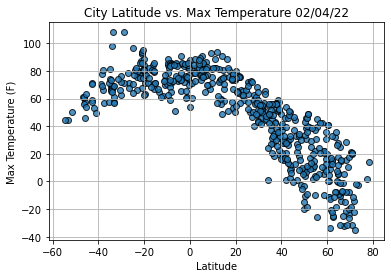

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

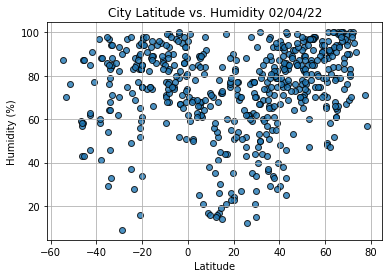

In [11]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

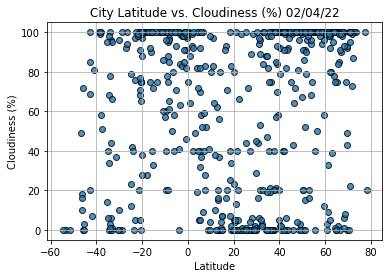

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

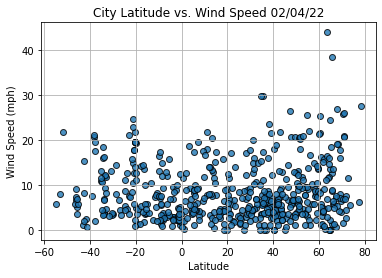

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                      Talnakh
Country                        RU
Date          2022-02-05 05:19:23
Lat                       69.4865
Lng                       88.3972
Max Temp                    -7.42
Humidity                       96
Cloudiness                     93
Wind Speed                   3.98
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
539     True
540     True
541    False
542     True
543     True
Name: Lat, Length: 544, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Tuktoyaktuk,CA,2022-02-05 05:19:21,69.4541,-133.0374,-23.80,76,0,16.11
7,Chokurdakh,RU,2022-02-05 05:19:21,70.6333,147.9167,-31.58,100,22,1.45
8,Albany,US,2022-02-05 05:15:43,42.6001,-73.9662,14.76,85,99,3.22
9,Cockburn Town,TC,2022-02-05 05:19:22,21.4612,-71.1419,75.83,74,0,17.20
10,Qaanaaq,GL,2022-02-05 05:17:56,77.4840,-69.3632,1.54,71,100,6.29


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

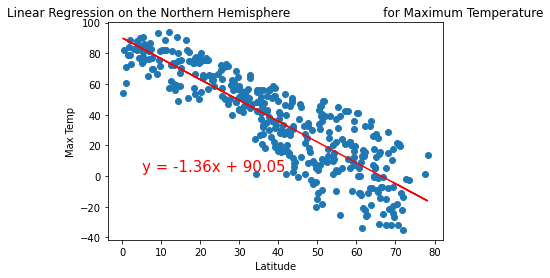

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,3))

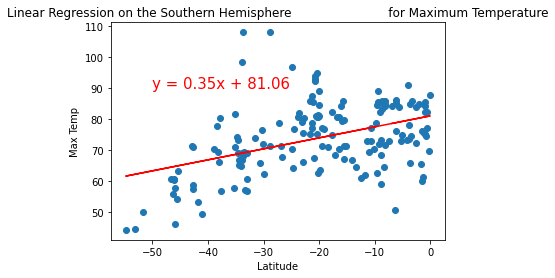

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

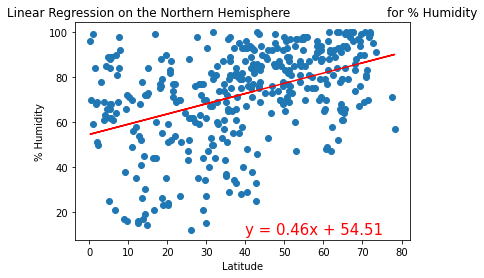

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

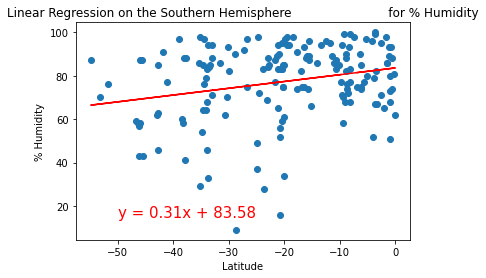

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

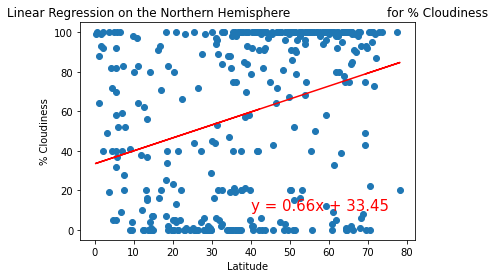

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

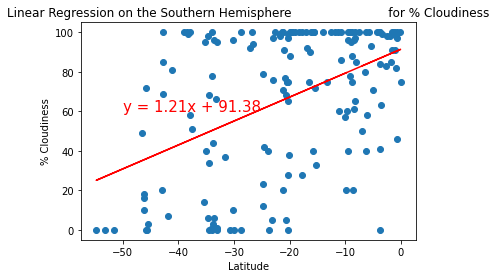

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

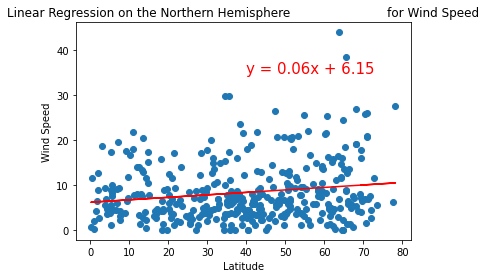

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

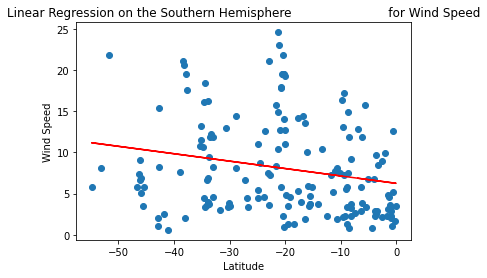

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))